오목판 크기를 입력해주세요 : 4
5 이상 입력해주세요
오목판 크기를 입력해주세요 : 5


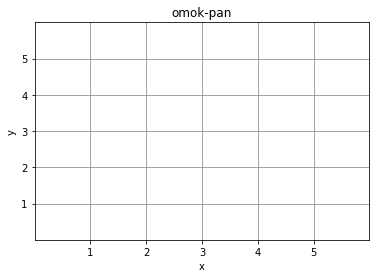

1플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 2 5


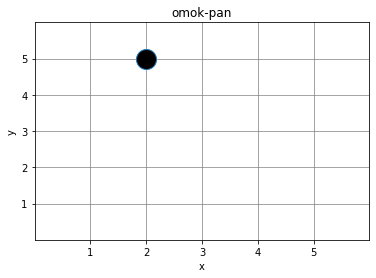

2플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 3 5


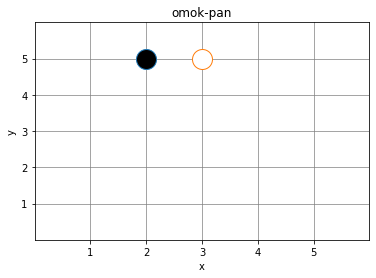

1플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 2 4


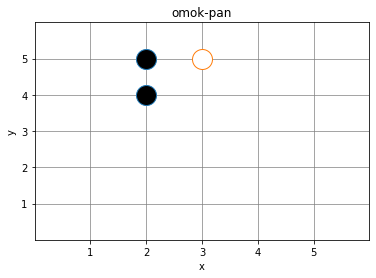

2플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 6 4
1 5 이나 2 2 이런 꼴로 입력해주세요.
2플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 5 4


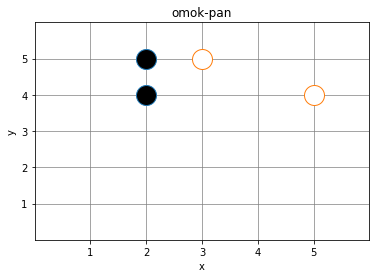

1플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 2 1


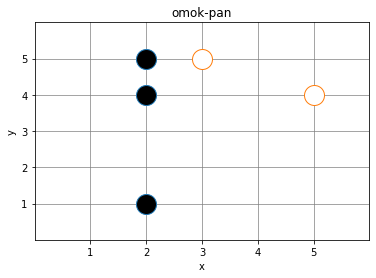

2플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 3 4


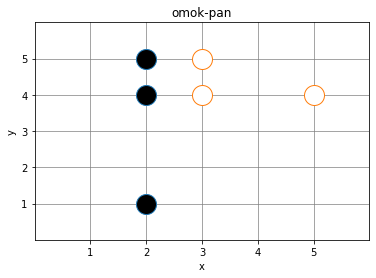

1플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 2 3


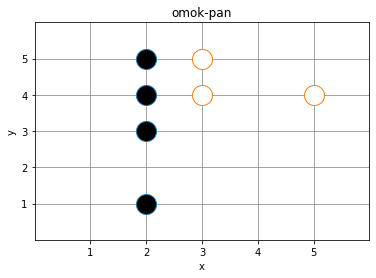

2플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 2 3
이미 두어진 자리입니다.
2플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 5 4
이미 두어진 자리입니다.
2플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 5 5


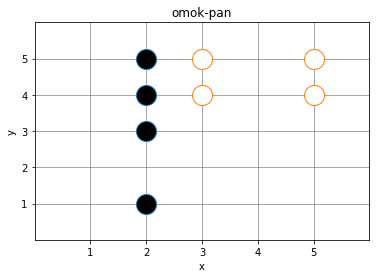

1플레이어 바둑돌 위치(x y)를 입력해주세요.1~5까지 숫자가 허용됩니다  : 2 2


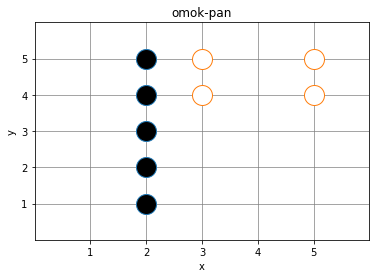

1플레이어가 승리


In [2]:
import numpy as np
import matplotlib.pyplot as plt

while True :
    shape = int(input('오목판 크기를 입력해주세요 : '))
    if shape >= 5:
        break
    else:
        print('5 이상 입력해주세요')           

grid = np.zeros((shape,shape))          # 오목판



In [ ]:
#플레이어 n이 이겼음을 알려주는 메서드
def win(n):
    print('{}플레이어가 승리'.format(n))         
    return 0

#어떤 플레이어가 이겼는지
def check(a):
    if np.all(a == 1):
        return win(1)
    elif np.all(a==2):
        return win(2)
    

#게임이 끝났는지 체크하는 메서드
def isEND():
    
    # 가로줄 체크
    for i in range(shape):
        for j in range(shape-4):
            if check(grid[i,j:j+5]) == 0:
                return 0          
                
    #세로줄 체크
    for i in range(shape):
        for j in range(shape-4):
            if check(grid[j:j+5,i]) == 0:
                return 0
            
        
    #대각선 체크
    #  ↘ 방향
    for i in range(shape-4):
        for j in range(shape-4):
            a= np.array([grid[i+k][j+k] for k in range(5)])     
            if check(a) == 0:
                return 0
    # ↗ 방향
    for i in range(shape-4):
        for j in range(shape-4):
            a= np.array([grid[shape-1-j-k][i+k] for k in range(5)])
            if check(a) == 0:
                return 0

#이미 두어진 자리인지 체크하는 메서드
def Play(player):
    while True:
        _input= input(f'{player}플레이어 바둑돌 위치(x y)를 입력해주세요.1~{shape}까지 숫자가 허용됩니다  : ')
        try:
            n,m =list(map(int,_input.split()))
            if grid[n-1,m-1] == 0:
                grid[n-1,m-1] = player
                break
            print('이미 두어진 자리입니다.')
        except:
            print('1 5 이나 2 2 이런 꼴로 입력해주세요.')
            
# 오목 진행 상황 보여줌
def Show(grid):
    plt.title('omok-pan')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0, shape+1,1)
    plt.ylim(0, shape+1,1)
    plt.xticks(np.arange(1, shape+1, step=1))
    plt.yticks(np.arange(1, shape+1, step=1))
    
    #grid 0,1,2 중 하나임. 1 일때 까만색, 2일 때 흰색.
    b_x = [i+1 for i in np.where(grid==1)[0]]
    b_y = [i+1 for i in np.where(grid==1)[1]]
    w_x = [i+1 for i in np.where(grid==2)[0]]
    w_y = [i+1 for i in np.where(grid==2)[1]]
          
    plt.plot(b_x,b_y, linestyle='None', markersize= 20, markerfacecolor= 'black', marker = 'o')
    plt.plot(w_x,w_y, linestyle='None', markersize= 20, markerfacecolor= 'white', marker = 'o')
    
    
    plt.grid(color='grey',linewidth=0.7)
    plt.show()


In [ ]:
#게임 시작    
    
Show(grid)

while True:
    
    Play(1)                  # 1번 플레이어 두고
    Show(grid)
    
    if isEND() == 0:          #게임 끝났는지 확인
        break
    
    Play(2)                  # 2번 플레이어
    Show(grid)  
                                   
    if isEND() == 0:
        break